In [1]:
from __future__ import division
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np,  matplotlib.pyplot as plt, numpy.random as npr, copy
from time import time
from pylab import plot, show, legend
from SV import *
from PF import *

In [2]:
propagate, potential = propagate_SV, potential_SV

In [8]:
x_0 = np.asarray([0])
theta = [0.9, 0.25, 0.1]
T = 250
y, X = simulate_data_SV(theta, x_0, T)
data = dict(x_0=x_0, y=y)
def test_fn(x) : return x

100%|██████████| 250/250 [00:00<00:00, 3172.06it/s]


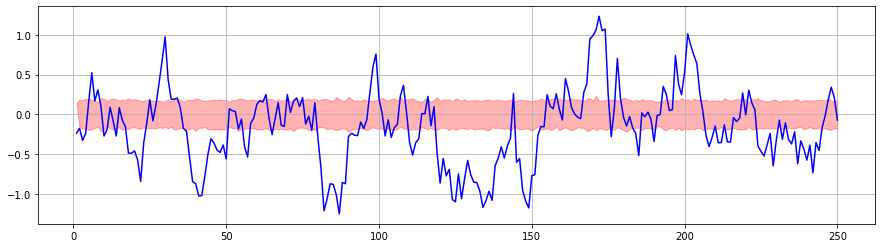

In [9]:
N = 1000
_, _, particles_bpf = bootstrap_PF(data, theta, potential, propagate, test_fn, N, store_paths=True)
plt.rcParams['figure.figsize'] = (15.0, 4.0)
CI = np.percentile(particles_bpf[:,:T,0],q=[2.5,97.5],axis=0)
plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
plt.grid(True)
plt.plot(np.arange(1,T+1), X[1:], "blue");

### AIRPF:

In [5]:
S = 4
A = npr.rand(S,N,N)
for s in range(S) :
    for i in range(N) :
        A[s,i] = A[s,i]/np.sum(A[s,i])

100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


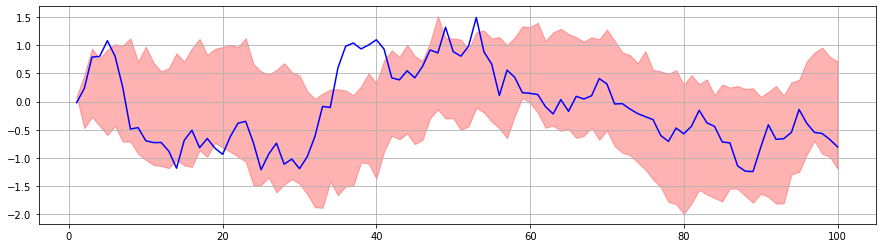

In [6]:
test_fn_est, particles_airpf = AIRPF(data, theta, potential, propagate, test_fn, A, store_paths=True)
plt.rcParams['figure.figsize'] = (15.0, 4.0)
CI = np.percentile(particles_airpf[:,:T,0],q=[2.5,97.5],axis=0)
plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
plt.grid(True)
plt.plot(np.arange(1,T+1), X[1:], "blue");